# 1A.data - Visualisation des données - cartes

Les cartes sont probablement les graphes les plus longs à mettre en place. Si les coordonnées longitude lattitude sont les plus utilisées, il est possible de les considérer comme des coordonnées carthésiennes sur une grande surface (sphérique). Il faut passer par une projection spécifique dans le plan. Il faut également ajouter des repères géographiques pour lire efficacement une carte comme les frontières des pays, les rivières... Tout ça prend du temps.

In [1]:
%matplotlib inline

In [2]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

## Cartographie

Dessiner une carte n'est pas difficile en soit. Toute la difficulté vient du fait qu'on a besoin pour lire cette carte de point de référence : les rues pour une ville, les frontières pour un département, une région, un pays, les fleuves et montagnes pour une carte représentation des données démographiques. Ces informations sont importantes pour situer l'information représentée par le graphique. Si vous n'avez pas besoin de tout ça, les formules suivantes vous suffiront :

- [Coordonnées sphériques](http://fr.wikipedia.org/wiki/Coordonn%C3%A9es_sph%C3%A9riques)
- [Conversion latitude/longitude to X/Y](http://www.movable-type.co.uk/scripts/latlong.html)
- [distance de Haversine](http://en.wikipedia.org/wiki/Haversine_formula)

Ces fonctionnalités sont disponibles via le module [geopy](https://github.com/geopy/geopy). Dans le cas contraire, voici quelques directions :

- [cartopy](https://scitools.org.uk/cartopy/docs/latest/) : le module est une surcouche du module [matplotlib](https://matplotlib.org/), il convertit les coordonnées géographiques et ajoutent quelques éléments de paysages (frontières, rivières...). Il ne contient pas tout comme la définition des départements français.
- [shapely](https://github.com/Toblerity/Shapely) : ce module est utile pour dessiner des aires sur des cartes. Sous Windows, la seule option est d'utiliser la distribution Anaconda ou de passer sur une distribution linux avec [Windows Linux Subsystem](https://learn.microsoft.com/en-us/windows/wsl/about).

Il en existe d'autres mais leur installation recèle quelques difficultés que je n'ai pas toujours eu la patience de contourner :

- [mapnik](http://mapnik.org/) : l'installation sur Windows est réservée aux connaisseurs, trop compliquée sous Windows.
- [geopandas](http://geopandas.org/index.html) manipule les coordonnées géographiques dans des dataframe et implémente des graphiques simples.

L'exemple qui suit utilise [cartopy](https://scitools.org.uk/cartopy/docs/latest/). Comme beaucoup de modules, il contient principalement des informations que le territoire américains.

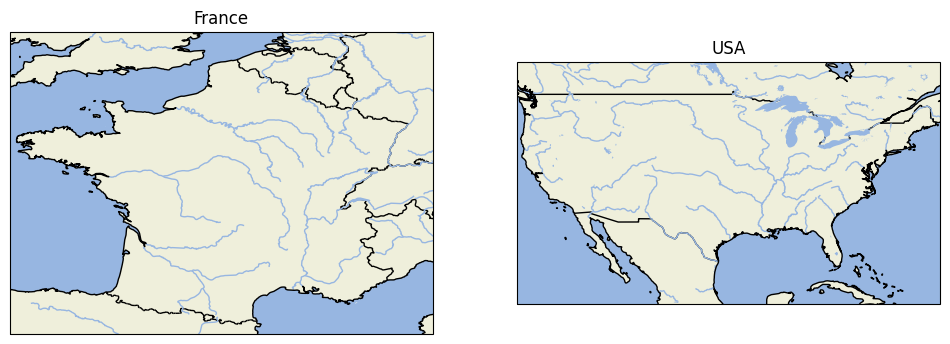

In [3]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
projection = ccrs.PlateCarree()
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 2, 1, projection=projection)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.COASTLINE)
ax.set_extent([-5, 9, 42, 52])
ax.set_title("France")

ax = fig.add_subplot(1, 2, 2, projection=projection)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.COASTLINE)
ax.set_extent([-125, -66.5, 20, 50])
ax.set_title("USA");
# debug

On peut améliorer la précision en précisant l'échelle avec la méthode [with_scale](https://scitools.org.uk/cartopy/docs/latest/matplotlib/feature_interface.html?highlight=with_scale#cartopy.feature.NaturalEarthFeature.with_scale) qui propose trois résolution 10m, 50m, 110m. La module [cartopy](https://scitools.org.uk/cartopy/docs/latest/) n'inclut que la résolution 110m, le reste doit être téléchargé. La première exécution prend un peu de temps.

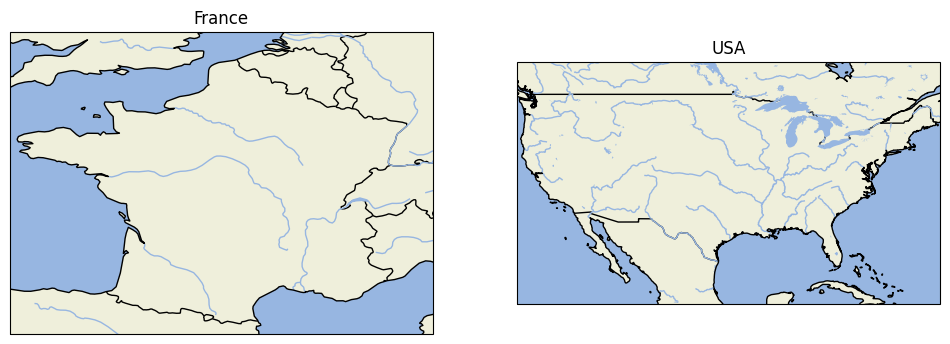

In [4]:
projection = ccrs.PlateCarree()
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 2, 1, projection=projection)
ax.add_feature(cfeature.BORDERS.with_scale('50m'))
ax.add_feature(cfeature.LAKES.with_scale('50m'))
ax.add_feature(cfeature.LAND.with_scale('50m'))
ax.add_feature(cfeature.OCEAN.with_scale('50m'))
ax.add_feature(cfeature.RIVERS.with_scale('50m'))
ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.set_extent([-5, 9, 42, 52])
ax.set_title("France")

ax = fig.add_subplot(1, 2, 2, projection=projection)
ax.add_feature(cfeature.BORDERS.with_scale('50m'))
ax.add_feature(cfeature.LAKES.with_scale('50m'))
ax.add_feature(cfeature.LAND.with_scale('50m'))
ax.add_feature(cfeature.OCEAN.with_scale('50m'))
ax.add_feature(cfeature.RIVERS.with_scale('50m'))
ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.set_extent([-125, -66.5, 20, 50])
ax.set_title("USA");

On peut ajouter un peu plus d'information avec la méthode [stock_img](https://scitools.org.uk/cartopy/docs/latest/matplotlib/geoaxes.html?highlight=stock_img#cartopy.mpl.geoaxes.GeoAxes.stock_img).

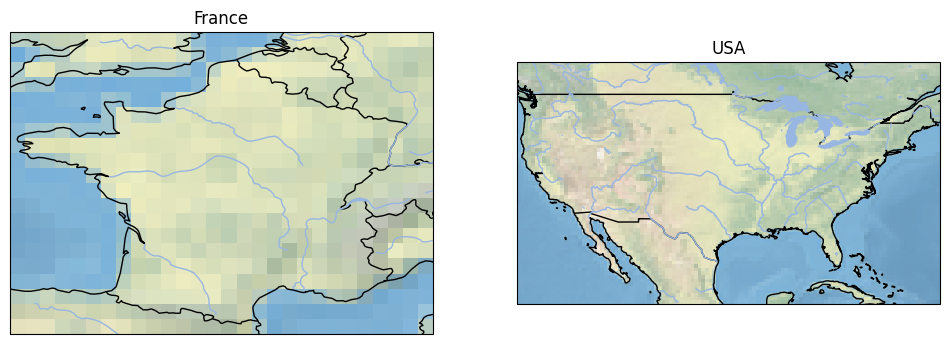

In [5]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
projection = ccrs.PlateCarree()
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 2, 1, projection=projection)
ax.add_feature(cfeature.BORDERS.with_scale('50m'))
ax.add_feature(cfeature.LAKES.with_scale('50m'))
ax.add_feature(cfeature.LAND.with_scale('50m'))
ax.add_feature(cfeature.OCEAN.with_scale('50m'))
ax.add_feature(cfeature.RIVERS.with_scale('50m'))
ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.set_extent([-5, 9, 42, 52])
ax.set_title("France")
ax.stock_img()

ax = fig.add_subplot(1, 2, 2, projection=projection)
ax.add_feature(cfeature.BORDERS.with_scale('50m'))
ax.add_feature(cfeature.LAKES.with_scale('50m'))
ax.add_feature(cfeature.LAND.with_scale('50m'))
ax.add_feature(cfeature.OCEAN.with_scale('50m'))
ax.add_feature(cfeature.RIVERS.with_scale('50m'))
ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.set_extent([-125, -66.5, 20, 50])
ax.stock_img()
ax.set_title("USA");

Cette fonction plaque une portion d'une grande image représentant la terre dans cette projection. On peut en obtenir d'autre à des résolutions différentes sur [1:10m Natural Earth I](https://www.naturalearthdata.com/downloads/10m-raster-data/10m-natural-earth-1/) ou encore [1:10m Gray Earth](https://www.naturalearthdata.com/downloads/10m-raster-data/10m-gray-earth/) mais ces images sont conséquentes. On s'inspire du code de la fonction [stock_img](https://scitools.org.uk/cartopy/docs/latest/_modules/cartopy/mpl/geoaxes.html#GeoAxes.stock_img) et on écrit le code qui suit. D'autres informations sont disponibles sur [github/natural-earth-vector](https://github.com/nvkelso/natural-earth-vector).

/tmp/ipykernel_31451/1518446146.py:25: UserWarning: L'image n'a pas été téléchargée. Lire le paragraphe qui précède.
  warnings.warn("L'image n'a pas été téléchargée. Lire le paragraphe qui précède.")


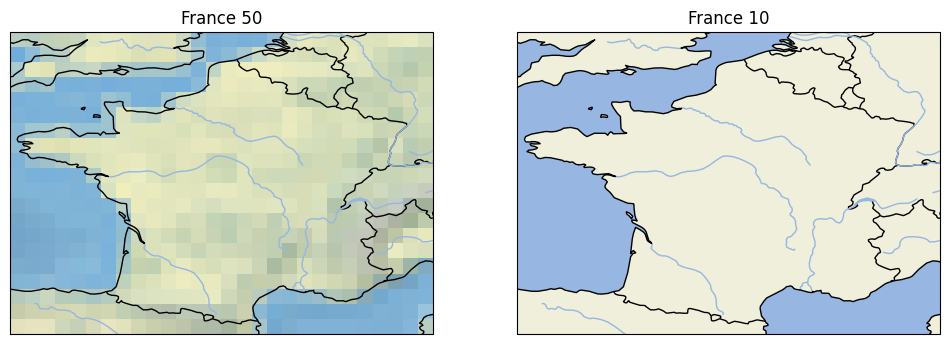

In [6]:
import os
from matplotlib.image import imread

projection = ccrs.PlateCarree()
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 2, 1, projection=projection)
ax.add_feature(cfeature.BORDERS.with_scale('50m'))
ax.add_feature(cfeature.LAKES.with_scale('50m'))
ax.add_feature(cfeature.LAND.with_scale('50m'))
ax.add_feature(cfeature.OCEAN.with_scale('50m'))
ax.add_feature(cfeature.RIVERS.with_scale('50m'))
ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.set_extent([-5, 9, 42, 52])
ax.set_title("France 50")
ax.stock_img()

ax = fig.add_subplot(1, 2, 2, projection=projection)

fname = "NE1_LR_LC.tif"
if os.path.exists(fname):
    ax.imshow(imread(fname), origin='upper', transform=projection,
              extent=[-180, 180, -90, 90]);
else:
    import warnings
    warnings.warn("L'image n'a pas été téléchargée. Lire le paragraphe qui précède.")
    
ax.add_feature(cfeature.BORDERS.with_scale('50m'))
ax.add_feature(cfeature.LAKES.with_scale('50m'))
ax.add_feature(cfeature.LAND.with_scale('50m'))
ax.add_feature(cfeature.OCEAN.with_scale('50m'))
ax.add_feature(cfeature.RIVERS.with_scale('50m'))
ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.set_extent([-5, 9, 42, 52])
ax.set_title("France 10");    

Presque parfait. Le suivant montre l'Europe et ses pays puis ajoute les méridiens et parallèles.

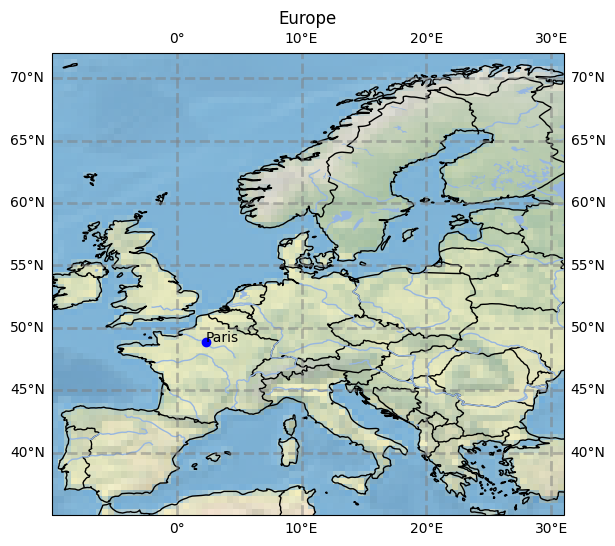

In [7]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
projection = ccrs.PlateCarree()
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 1, 1, projection=projection)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.COASTLINE)
ax.set_extent([-10, 31, 35, 71])
ax.stock_img()
ax.set_title("Europe")

x, y = 2.3488000, 48.853410
ax.plot(x, y, 'bo', markersize=6)
ax.text(x, y, "Paris")

ax.gridlines(crs=projection, draw_labels=True,
             linewidth=2, color='gray', alpha=0.5, linestyle='--');

### Cartes avec les départements

Pour dessiner des formes sur une carte, il faut connaître les coordonnées de ces formes. La première chose à faire est de récupérer leurs données géographiques. Une fois simple de les trouver est d'utiliser un moteur de recherche avec le mot clé **shapefile** inclus dedans : c'est le format du fichier. *shapefile france* permet d'obtenir quelques sources. En voici d'autres :

* [GADM](http://www.gadm.org/) : database of Global Administrative Areas
* [OpenData.gouv commune](https://www.data.gouv.fr/fr/datasets/geofla-communes/) : base de données sur data.gouv.fr
* [The National Map Small-Scale Collection](http://nationalmap.gov/small_scale/#chpbound) : Etats-Unis
* [ArcGIS](https://developers.arcgis.com/javascript/jsapi/esri.basemaps-amd.html) : API Javascripts
* [Natural Earth](http://www.naturalearthdata.com/) : Natural Earth is a public domain map dataset available at 1:10m, 1:50m, and 1:110 million scales. Featuring tightly integrated vector and raster data, with Natural Earth you can make a variety of visually pleasing, well-crafted maps with cartography or GIS software.
* [thematicmapping](http://thematicmapping.org/downloads/world_borders.php) : World Borders Dataset
* [OpenStreetMap Data Extracts](http://download.geofabrik.de/) : OpenStreetMap data
* [OpenStreetMapData](http://openstreetmapdata.com/) : OpenStreetMap data
* [Shapefile sur Wikipedia](http://wiki.openstreetmap.org/wiki/Shapefiles) : contient divers liens vers des sources de données

La première chose à vérifier est la licence associées aux données : on ne peut pas en faire ce qu'on veut. Pour cet exemple, j'avais choisi la première source de données, GADM. La licence n'est pas précisée explicitement (on pouvait trouver *happy to share* sur le site, la page wikipedia [GADM](https://en.wikipedia.org/wiki/GADM) précise : *GADM is not freely available for commercial use. The GADM project created the spatial data for many countries from spatial databases provided by national governments, NGO, and/or from maps and lists of names available on the Internet (e.g. from Wikipedia)*. C'est le choix que j'avais fait en 2015 mais l'accès à ces bases a probablement changé car l'accès est restreint. J'ai donc opté pour les bases accessibles depuis [data.gouv.fr](https://www.data.gouv.fr/fr/datasets/geofla-departements-30383060/). Leur seul inconvénient est que les coordonnées sont exprimées dans une projection de type [Lambert 93](https://fr.wikipedia.org/wiki/Projection_conique_conforme_de_Lambert). Cela nécessite une conversion.

*L'accès aux données géographiques s'est démocratisé et nombreux pays disposent maintenant d'un site mettant à disposition gratuitement ce type de données. C'est sans doute la source de données à privilégié avec notemment la description des zones administratives comme les départements, régions dont les définitions peuvent changer.*

In [8]:
from pyensae.datasource import download_data
try:
    download_data("GEOFLA_2-1_DEPARTEMENT_SHP_LAMB93_FXX_2015-12-01.7z", 
                  website="https://wxs-telechargement.ign.fr/oikr5jryiph0iwhw36053ptm/telechargement/inspire/" + \
                          "GEOFLA_THEME-DEPARTEMENTS_2015_2$GEOFLA_2-1_DEPARTEMENT_SHP_LAMB93_FXX_2015-12-01/file/")
except Exception as e:
    # au cas le site n'est pas accessible
    download_data("GEOFLA_2-1_DEPARTEMENT_SHP_LAMB93_FXX_2015-12-01.7z", website="xd")

In [9]:
from pyquickhelper.filehelper import un7zip_files
try:
    un7zip_files("GEOFLA_2-1_DEPARTEMENT_SHP_LAMB93_FXX_2015-12-01.7z", where_to="shapefiles")
    departements = 'shapefiles/GEOFLA_2-1_DEPARTEMENT_SHP_LAMB93_FXX_2015-12-01/GEOFLA/1_DONNEES_LIVRAISON_2015/' + \
                   'GEOFLA_2-1_SHP_LAMB93_FR-ED152/DEPARTEMENT/DEPARTEMENT.shp'
except FileNotFoundError as e:
    # Il est possible que cette instruction ne fonctionne pas.
    # Dans ce cas, on prendra une copie de ce fichier.
    import warnings
    warnings.warn("Plan B parce que " + str(e))
    download_data("DEPARTEMENT.zip")
    departements = "DEPARTEMENT.shp"
    
if not os.path.exists(departements):
    raise FileNotFoundError("Impossible de trouver '{0}'\ncurrent folder: '{1}'".format(
        departements, os.getcwd()))

La license accompagne les données : *ce produit est téléchargeable et utilisable gratuitement sous licence* [Etalab](https://www.etalab.gouv.fr/licence-ouverte-open-licence). Pour un usage commercial, il faut faire attentation à la license associée aux données. Le seul inconvénient des données *GEOFLA* est que certaines sont données dans le système de coordonnées [Lambert 93](https://fr.wikipedia.org/wiki/Projection_conique_conforme_de_Lambert) (voir aussi [Cartographie
avec R](https://www.sylvaindurand.org/cartographie-avec-R/)).

In [10]:
shp = departements
import shapefile
r = shapefile.Reader(shp)
shapes = r.shapes()
records = r.records()
len(shapes), len(records)

(96, 96)

In [11]:
r.shpLength, r.numRecords

(3134040, 96)

In [12]:
r.bbox

[99217.1, 6049646.300000001, 1242417.2, 7110480.100000001]

In [13]:
r.shapeType

5

On regarde une zone en particulier mais on réduit la quantité de données affichées :

In [14]:
d = shapes[0].__dict__.copy()
d["points"] = d["points"][:10]
d

{'shapeType': 5,
 'points': [(701742.0, 6751181.100000001),
  (701651.9, 6751166.9),
  (701552.0, 6751162.7),
  (700833.7000000001, 6751313.7),
  (700669.4, 6751380.0),
  (700475.4, 6751476.600000001),
  (700400.7000000001, 6751517.2),
  (700098.3, 6751789.600000001),
  (699993.8, 6751845.4),
  (699874.1000000001, 6751876.4)],
 'parts': [0],
 '_errors': {},
 '_Shape__oid': 0,
 'bbox': [688654.4, 6690595.300000001, 800332.3, 6811114.5]}

In [15]:
records[0]

Record #0: ['DEPARTEM0000000000000004', '89', 'YONNE', '024', 'AUXERRE', 742447, 6744261, 748211, 6750855, '27', 'BOURGOGNE-FRANCHE-COMTE']

J'utilise une fonction de conversion des coordonnées récupérée sur [Internet](https://gist.github.com/blemoine/e6045ed93b3d90a52891).

In [16]:
import math

def lambert932WGPS(lambertE, lambertN):

    class constantes:
        GRS80E = 0.081819191042816
        LONG_0 = 3
        XS = 700000
        YS = 12655612.0499
        n = 0.7256077650532670
        C = 11754255.4261

    delX = lambertE - constantes.XS
    delY = lambertN - constantes.YS
    gamma = math.atan(-delX / delY)
    R = math.sqrt(delX * delX + delY * delY)
    latiso = math.log(constantes.C / R) / constantes.n
    sinPhiit0 = math.tanh(latiso + constantes.GRS80E * math.atanh(constantes.GRS80E * math.sin(1)))
    sinPhiit1 = math.tanh(latiso + constantes.GRS80E * math.atanh(constantes.GRS80E * sinPhiit0))
    sinPhiit2 = math.tanh(latiso + constantes.GRS80E * math.atanh(constantes.GRS80E * sinPhiit1))
    sinPhiit3 = math.tanh(latiso + constantes.GRS80E * math.atanh(constantes.GRS80E * sinPhiit2))
    sinPhiit4 = math.tanh(latiso + constantes.GRS80E * math.atanh(constantes.GRS80E * sinPhiit3))
    sinPhiit5 = math.tanh(latiso + constantes.GRS80E * math.atanh(constantes.GRS80E * sinPhiit4))
    sinPhiit6 = math.tanh(latiso + constantes.GRS80E * math.atanh(constantes.GRS80E * sinPhiit5))

    longRad = math.asin(sinPhiit6)
    latRad = gamma / constantes.n + constantes.LONG_0 / 180 * math.pi

    longitude = latRad / math.pi * 180
    latitude = longRad / math.pi * 180

    return longitude, latitude

lambert932WGPS(99217.1, 6049646.300000001), lambert932WGPS(1242417.2, 7110480.100000001)

((-4.1615802638173065, 41.30350528758955),
 (10.699505053975292, 50.85243395553585))

Après plusieurs recherches sur internet, un grand nombre, on aboutit à la carte suivante non sans avoir redéfini des contours et frontières plus précis inspiré du code [feature.py](https://github.com/SciTools/cartopy/blob/master/lib/cartopy/feature.py).

In [17]:
from cartopy.feature import NaturalEarthFeature, COLORS
resolution = "50m"
BORDERS = NaturalEarthFeature('cultural', 'admin_0_boundary_lines_land',
                              resolution, edgecolor='black', facecolor='none')
STATES = NaturalEarthFeature('cultural', 'admin_1_states_provinces_lakes',
                             resolution, edgecolor='black', facecolor='none')
COASTLINE = NaturalEarthFeature('physical', 'coastline', resolution,
                                edgecolor='black', facecolor='none')
LAKES = NaturalEarthFeature('physical', 'lakes', resolution,
                            edgecolor='face',
                            facecolor=COLORS['water'])
LAND = NaturalEarthFeature('physical', 'land', resolution,
                           edgecolor='face',
                           facecolor=COLORS['land'], zorder=-1)
OCEAN = NaturalEarthFeature('physical', 'ocean', resolution,
                            edgecolor='face',
                            facecolor=COLORS['water'], zorder=-1)
RIVERS = NaturalEarthFeature('physical', 'rivers_lake_centerlines', resolution,
                             edgecolor=COLORS['water'],
                             facecolor='none')

Record #0: ['DEPARTEM0000000000000004', '89', 'YONNE', '024', 'AUXERRE', 742447, 6744261, 748211, 6750855, '27', 'BOURGOGNE-FRANCHE-COMTE'] [0]


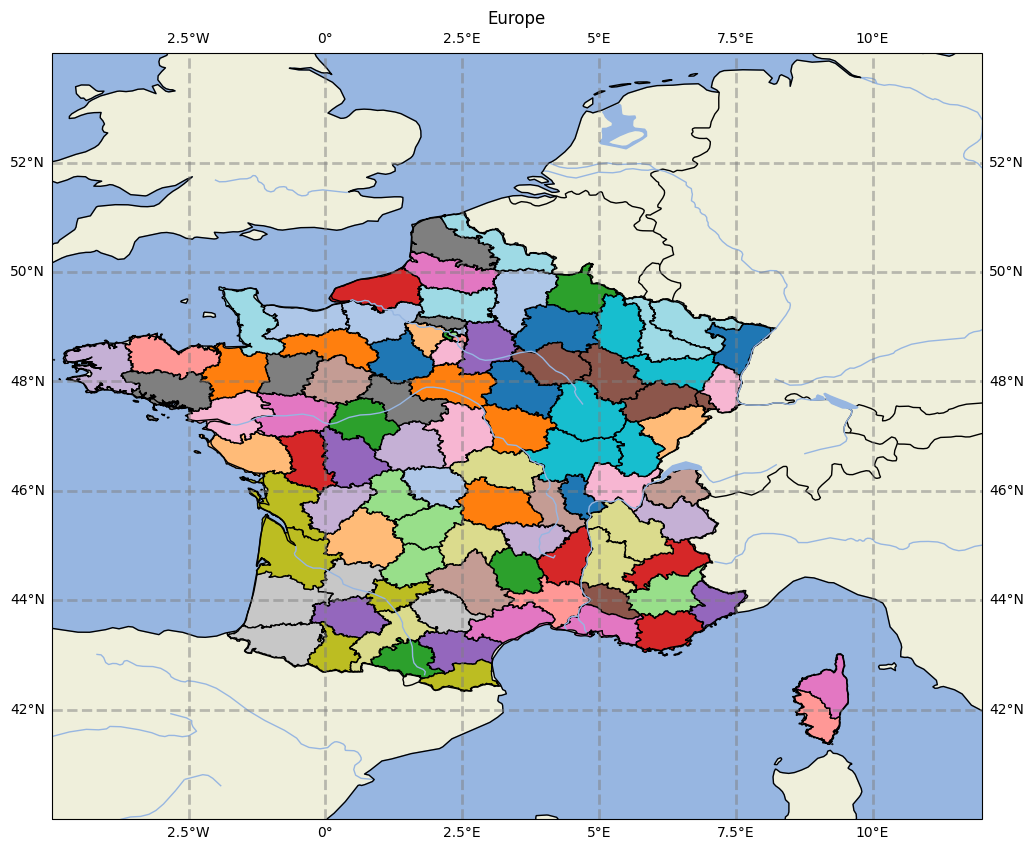

In [18]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
projection = ccrs.PlateCarree()
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(1, 1, 1, projection=projection)
ax.add_feature(BORDERS)
ax.add_feature(LAKES)
ax.add_feature(LAND)
ax.add_feature(OCEAN)
ax.add_feature(RIVERS)
ax.add_feature(COASTLINE)
ax.set_extent([-5, 12, 40, 54])
ax.set_title("Europe")
ax.gridlines(crs=projection, draw_labels=True,
             linewidth=2, color='gray', alpha=0.5, linestyle='--')

from matplotlib.collections import LineCollection
import shapefile
import geopandas
from shapely.geometry import Polygon
from shapely.ops import cascaded_union, unary_union
 
shp = departements
r = shapefile.Reader(shp)
shapes = r.shapes()
records = r.records()

polys = []
for i, (record, shape) in enumerate(zip(records, shapes)):
    # les coordonnées sont en Lambert 93
    if i == 0:
        print(record, shape.parts)
    geo_points = [lambert932WGPS(x,y) for x, y in shape.points]
    if len(shape.parts) == 1:
        # Un seul polygone
        poly = Polygon(geo_points)
    else:
        # Il faut les fusionner.
        ind = list(shape.parts) + [len(shape.points)]
        pols = [Polygon(geo_points[ind[i]:ind[i+1]]) for i in range(0, len(shape.parts))]
        try:
            poly = unary_union(pols)
        except Exception as e:
            print("Cannot merge: ", record)
            print([_.length for _ in pols], ind)
            poly = Polygon(geo_points)
    polys.append(poly)
    
data = geopandas.GeoDataFrame(geometry=polys)
# cmap -> voir https://matplotlib.org/users/colormaps.html
data.plot(ax=ax, cmap='tab20', edgecolor='black');
# Ou pour définir des couleurs spécifiques.
# geopandas.plotting.plot_polygon_collection(ax, data['geometry'], facecolor=data['colors'], values=None)

### Cartes interactives

La vidéo [Spatial data and web mapping with Python](http://www.youtube.com/watch?v=qmgh14LUOjQ&feature=youtu.be) vous en dira un peu plus sur la cartographie. Lorsqu'on dessine une carte avec les rues d'une ville, on veut pouvoir zoomer et dézoomer facilement pour avoir une vue d'ensemble ou une vue détaillé. Dans ce cas là, il faut utiliser un service externe telle que [Gmap API](https://developers.google.com/maps/?hl=FR), [Bing Map API](http://www.microsoft.com/maps/choose-your-bing-maps-API.aspx), [Yahoo Map API](https://developer.yahoo.com/maps/simple/V1/) ou [OpenStreetMap](https://openstreetmap.fr/) qui est une version open source. Dans tous les cas, il faut faire attention si les données que vous manipulez dans la mesure où elles transitent par un service externe. L'article [Busy areas in Paris](http://www.xavierdupre.fr/blog/2013-09-26_nojs.html) est un exemple d'utilisation d'[OpenStreetMap](https://openstreetmap.fr/). Ce qu'on cherche avant tout, c'est un [graphique interactif](#inter). Il existe des modules qui permettent d'utiliser ces services directement depuis un notebook python.

Le module [folium](https://github.com/wrobstory/folium) insert du javascript dans le notebook lui-même. Voici un exemple construit à partir de ce module : [Creating Interactive Election Maps Using folium and IPython Notebooks](http://blog.ouseful.info/2015/04/17/creating-interactive-election-maps-using-folium-and-ipython-notebooks/). Il est prévu pour fonctionner comme suit. D'abord, une étape d'initialisation :

In [19]:
import folium

Et si elle fonctionne (un jour peut-être), la suite devrait être :

In [20]:
map_osm = folium.Map(location=[48.85, 2.34])
map_osm

Donc, on prend un raccourci et on en profite pour ajouter un triangle à l'emplacement de l'ENSAE :

In [21]:
import folium
map_osm = folium.Map(location=[48.711478,2.207708])
from pyensae.notebookhelper import folium_html_map
map_osm.add_child(folium.RegularPolygonMarker(location=[48.711478,2.207708], popup='ENSAE', 
                       fill_color='#132b5e', radius=10))
from IPython.display import HTML
#HTML(folium_html_map(map_osm))
map_osm

Un moteur de recherche vous donnera rapidement quelques exemples de cartes utilisant ce module :
[Folium Polygon Markers](http://bl.ocks.org/wrobstory/5609786), [Easy interactive maps with folium](https://ocefpaf.github.io/python4oceanographers/blog/2014/05/05/folium/), [Plotting shapefiles with cartopy and folium](https://ocefpaf.github.io/python4oceanographers/blog/2015/02/02/cartopy_folium_shapefile/).